<a href="https://colab.research.google.com/github/mauro-nieva/Lint/blob/master/HPC/Modulos_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introducción

Este cuaderno muestra distintos tipos de manejo de datos y graficos a partir de la carga de un archivo csv que contiene las ventas de una empresa entre los años 2001 y 2003. Su objetivo es utilizar Python[2] en la plataforma Colab[1,3] y explorar algunos de sus distintos modulos.

* datetime: librería de con funciones para manipular objetos de tiempo.
* pandas: librería para la manipulación y limpieza de datos.[6]
* matplotlib: librería especializada en visualización de datos.[5]
* statsmodel: librería que contiene funciones y modelos estadísticos para el análisis de datos.[4]

---
# 2 Armado del ambiente
Se carga el archivo csv que contiene los datos https://github.com/mauro-nieva/Lint/blob/master/HPC/ventas_2001_2003.csv

In [30]:
#@title # 2.1 Carga de archivo csv
#@markdown ---
from google.colab import files 
  
  
uploaded = files.upload()

Saving ventas_2001_2003.csv to ventas_2001_2003 (2).csv


---
# 3 Desarrollo

     Month  Sales
0  2001-01  266.0
1  2001-02  145.9
2  2001-03  183.1
3  2001-04  119.3
4  2001-05  180.3
5  2001-06  168.5
6  2001-07  231.8
7  2001-08  224.5
8  2001-09  192.8
9  2001-10  122.9


Cantidad de valores vacíos:
Month    0
Sales    0
dtype: int64


Tipos:
Month     object
Sales    float64
dtype: object


Month como fecha:
       Month  Sales
0 2001-01-01  266.0
1 2001-02-01  145.9
2 2001-03-01  183.1
3 2001-04-01  119.3
4 2001-05-01  180.3
5 2001-06-01  168.5
6 2001-07-01  231.8
7 2001-08-01  224.5
8 2001-09-01  192.8
9 2001-10-01  122.9


Tipos:
Month    datetime64[ns]
Sales           float64
dtype: object


Month como indice:
            Sales
Month            
2001-01-01  266.0
2001-02-01  145.9
2001-03-01  183.1
2001-04-01  119.3
2001-05-01  180.3
2001-06-01  168.5
2001-07-01  231.8
2001-08-01  224.5
2001-09-01  192.8
2001-10-01  122.9
Mejor mes de 2001 es November
Mejor mes de 2002 es October
Mejor mes de 2003 es September


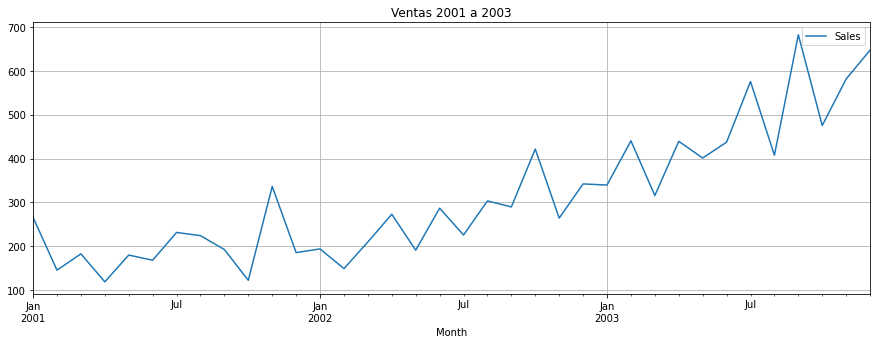

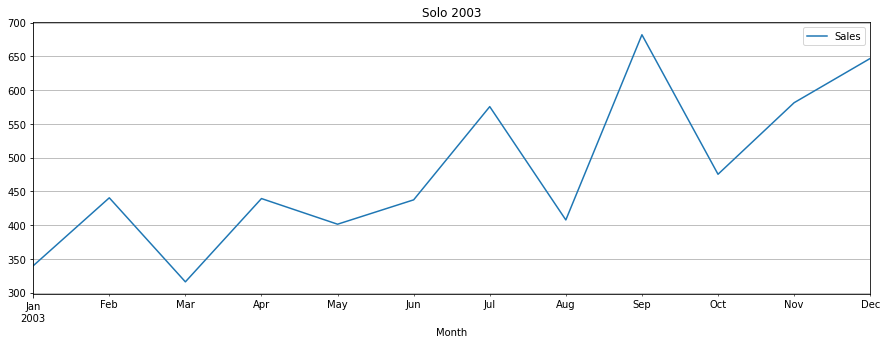

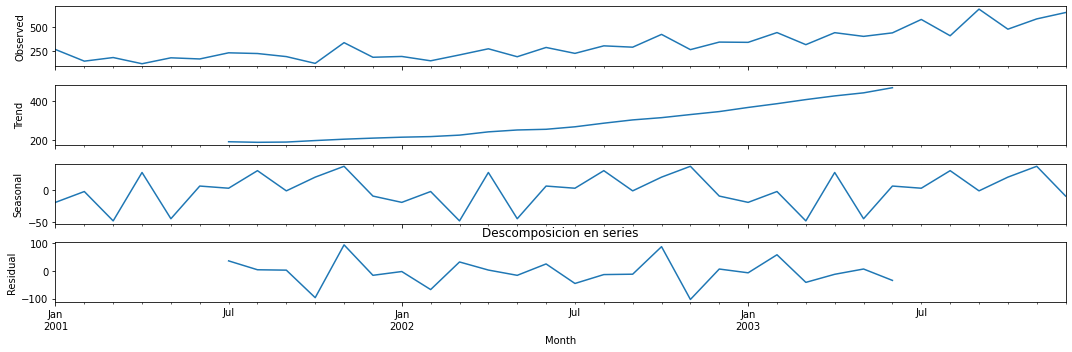

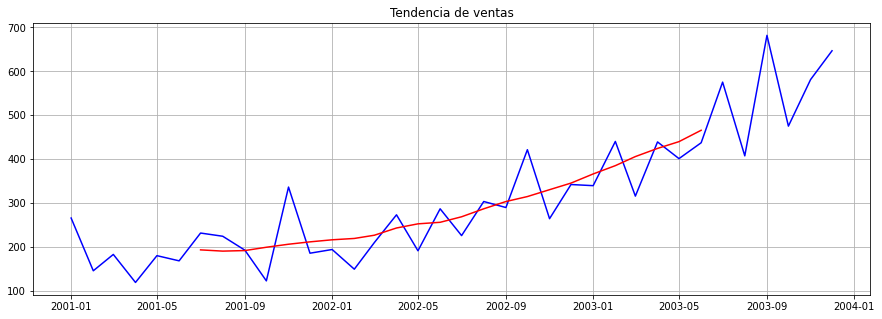

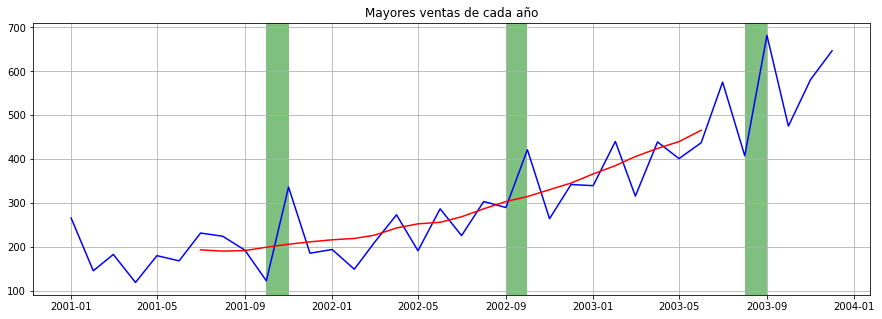

In [33]:
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

matplotlib.rcParams['figure.figsize'] = (15, 5)

#leemos el archivo csv y se imprimen los primeros 10
#verificar con que nombre se cargo el archvio
df = pd.read_csv('ventas_2001_2003.csv')
print(df.head(10))

#Se identifica si hay valores vacios y se especifica la cantidad
print("\n\nCantidad de valores vacíos:")
print(df.isnull().sum())

#Se muestran los tipos
print("\n\nTipos:")
print(df.dtypes)

#Se convierte a tipo fecha a la columna Month
df['Month'] = pd.to_datetime(df['Month'])
print("\n\nMonth como fecha:")
print(df.head(10))

print("\n\nTipos:")
print(df.dtypes)

#Se establece la columna Month como indice
df.set_index('Month', inplace=True)
print("\n\nMonth como indice:")
print(df.head(10))

#Se grafican los datos
df.plot(grid=True, figsize=(15,5))
plt.title("Ventas 2001 a 2003")

#Se filtran datos y se grafica
start_date = datetime(2003, 1, 1)
end_date = datetime(2003, 12, 31)
df[(df.index >= start_date) & (df.index <=end_date)].plot(grid=True, figsize=(15,5))
plt.title("Solo 2003")

#Descomposicion en series
decompose = seasonal_decompose(df)
figure = decompose.plot()
plt.title("Descomposicion en series")


#Se superpone la tendencia de ventas
fig, ax = plt.subplots()
ax.grid(True)

plt.title("Tendencia de ventas")
plt.plot(df.index, df['Sales'], c='blue')
plt.plot(decompose.trend.index, decompose.trend, c='red')

# Muestra el mes con más ventas de cada año
fig, ax = plt.subplots()
ax.grid(True)

for year in df.index.year.unique():
  month = df[df.index.year == year].idxmax().loc['Sales'].month
  print("Mejor mes de {} es {}".format(
    year,
    datetime.strptime(str(month), "%m").strftime("%B"))
  )
  ax.axvspan(
    datetime(year, month - 1, 1),
    datetime(year, month, 1),
    facecolor='green',
    edgecolor='none',
    alpha=.5
  )

plt.title("Mayores ventas de cada año")
plt.plot(df.index, df['Sales'], c='blue')
plt.plot(decompose.trend.index, decompose.trend, c='red')
plt.show()

---
#4 Tabla de pasos
Tabla de pasos de la ejecución del programa:

 Procesador | Función | Detalle
------------|---------|----------
CPU      |  upload()                | Carga del archivo csv.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  read_csv        | Lectura del archivo csv.
CPU      |  head(10) | Se visualizan los primeros 10 registros.
CPU      |  isnull().sum()        | Se identifican valores vacios.
CPU      |  dtypes                | Se visualizan los tipos de datos. 
CPU      |  to_datetime        | Conversion de Month a datetime.
CPU      |  set_index               | Se establece Month como indice.
CPU      |  plot       | Grafico de los datos.
CPU      |  index >= start_date       | Filtrar datos. Grafico de 2003 solamente.
CPU      |  decompose.plot()      | Descomposicion en series.
CPU      |  plt.subplots()       | Superposicion de graficos. Tendencia de ventas.
CPU      |  axvspan       | Mayores ventas de cada año.



 


---
# 5 Conclusiones

Como conclusion podemos destacar que Python es un lenguaje bastante sencillo e intuitivo, sin embrago esto no quiere decir que se aprenda rapido en profundidad ya que sus modulos son muy amplios en funcionalidad. Su aplicacion en Colab es muy practica ya que es una forma rapida de codificar en un entorno virtualizado.

---
# 6 Bibliografía

[1] MARKDOWN SYNTAX Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[2] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[3] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[4] statsmodels : [Pagina statsmodels](https://www.statsmodels.org/stable/index.html)

[5] matplotlib : [Pagina matplotlib](https://matplotlib.org/)

[6] pandas : [Pagina pandas](https://pandas.pydata.org/)
